# Covid-19 Data Visualisation with Altair
> An introduction to Altair package

- toc: true
- badges: true
- comments: true
- categories: [altair, visualization]
- image: images/covid_visual.png

Data visualisation is a vital step in data analysis process since it gives a quick intuition about the data. It can reveal insights which cannot be easily conveyed by numbers.

I got to know about Altair package when I was searching the web on how to plot a choropleth map of India for my simple covid dashboard. The syntax was a bit different as I was only familiar with matplotlib and seaborn for visualization.

## Need for Altair

The few well known visulaization packages in Python often have **imperative APIs**. This means the user has to focus more on the mechanics of visualization rather than the important relationships within data.

| Imperative | Declarative |
| ---------- | ----------- |
| - Specify *How* something should be done | - Specify *What* should be done |
| - Must *manually* specify ploting steps | - Details determined *automatically* |
| - Specification and Execution are *intertwined* | - *Separates* Specification from Execution |

[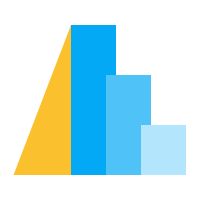](https://altair-viz.github.io/)

Altair feautres **declarative API** for exploratory visualization in Python allowing us to focus more on the data than incidental details. It is based on [Vega](https://vega.github.io/vega/) and [Vega-Lite](http://vega.github.io/vega-lite/) visulaization grammars.

Visit the [installation page](https://altair-viz.github.io/getting_started/installation.html) for instructions to install the Altair package.

> Important: Dont forget to import altair in you notebook after the installation.

In [1]:
import altair as alt
# run this line if you are having trouble displaying charts 
#alt.renderers.enable('default')

In [2]:
#hide
import numpy as np
import pandas as pd
alt.themes.enable('dark')

ThemeRegistry.enable('dark')

In [3]:
#hide
country_df = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')
latest_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')
vaccine_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')

country_df.drop(['Date'], axis = 1,inplace=True)

country_df.rename(columns={'Date_YMD':'Date'},inplace=True)

country_df["Date"]= pd.to_datetime(country_df["Date"])
# country_df.set_index('Date')

latest_30_df = country_df.tail(30).drop(['Total Confirmed','Total Recovered','Total Deceased'], axis=1)

latest_30_df.columns = ['Date','Confirmed','Recovered','Deceased']

latest_30_df = pd.melt(latest_30_df, id_vars='Date', var_name='Cases',value_name='Count')


## Fundamentals

Data in Altair is built around Pandas Dataframe. I have already imported Pandas and cleaned my dataset for visualization. There are many example dataset in [vega datasets package](https://github.com/altair-viz/vega_datasets), you can try creating interactive charts on them.

In addition to Altair's documentaion there are good number of Altair tutorials, I recommend you go throuh them prior to this walkthrogh.

> Tip: One of the best Altair tutorial I used to get started is [Altair notebooks](https://github.com/altair-viz/altair_notebooks) check out the link and launch binder to run the notebooks and experiment on them. 

## Fundamentals

### Chart Object

The fundamental object in Altair is the `Chart` object which takes a dataframe as a single argument. By itself, a chart has no meaning, it is used in conjuction with **data**, **marks**, and **encodings**, which are the core pieces in an Altair chart.

`alt.Chart(data)`

### Marks

`mark` attribute of the chart object is used to specify how we would like the data to be visualized. There are many available marks that can be used like point, circle, square, etc.

`alt.Chart(data).mark_point()`


### Encodings

TO visually seperate the points, we can map various encoding channels, to columns in the dataset. There are many encoding channels such as `x`, `y`, `color`, `shape`, `size`, etc. The `encode()` method builds a key-value mapping between encoding channels to the columns in the dataset.

`alt.Chart(data).mark_point().encode(x='a', y='b')`

### Layered Charts

Layered charts allow us to overlay two or more different charts on the same set of axes. They can be used to draw mutiple marks for the same data.

We can use `+` operator to create a layered chart, alternatively we could use the `alt.layer` function which accepts any number or charts. The order of layers is determined from the order in which they are specified. You can adjust the opacity of the layers to you liking if you dont want the upper layer to obscure the marks of lower layer.

`layer1 + layer2` or `alt.layer(layer1, layer2)`

> Note: If you pretty much get a basic idea on these fundamentals you're good to go and can create really cool interactive plots.

## Covid-19 Plots

After learning to create an choropleth map in Altair, I actually decided to redo all my other plots for my dashboard in Altair :upside_down_face:
Checkout the charts I ended up creating with the code from below, and if you are interested to see the complete dashboard you can launch this binder (be patient :turtle:). [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/hisenberg-lab/covid/HEAD?urlpath=%2Fvoila%2Frender%2Fcovid_dashboard.ipynb)


### Line Chart

In [4]:
latest_30_df.head()

,Date,Cases,Count
0,2021-04-01,Confirmed,81398
1,2021-04-02,Confirmed,89023
2,2021-04-03,Confirmed,92994
3,2021-04-04,Confirmed,103794
4,2021-04-05,Confirmed,96563


In [5]:
hover = alt.selection_single(on='mouseover')
scale = alt.Scale(domain=['Confirmed', 'Recovered', 'Deceased'],
                  range=['red', 'green', 'purple'])
line = alt.Chart(latest_30_df).mark_line(point=True, strokeWidth=3).encode(
    x=alt.X('Date:T', axis=alt.Axis(offset=3)),
    y='Count:Q',color=alt.Color('Cases:N',scale=scale),
    opacity=alt.condition(hover, alt.value(1.0), alt.value(0.5))
).properties(width=550,height=250,selection=hover)
text = alt.Chart(latest_30_df.query("Date == Date.max()")).mark_text(
    dx=-25,dy=-12, fontSize=25).encode(x='Date:T',
                                       y='Count:Q',
                                       text='Count:Q',color=alt.Color('Cases:N',scale=scale))
alt.layer(line,text,data = latest_30_df).configure(background='black').configure_axis(grid=False).configure_view(strokeWidth=0)

alt.LayerChart(...)

In [6]:
country_df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0


In [7]:
hover = alt.selection_single(on='mouseover',nearest=True, fields=['Date'])

line = alt.Chart(title="Confirmed Cases").mark_line().encode(
    x=alt.X('Date:T', axis=alt.Axis(offset=2)),
    y="Daily Confirmed",color=alt.value("red")
).properties(width=680, height=370).interactive()

point = line.mark_point().encode(opacity=alt.value(0.0)).properties(selection=hover)

text = alt.Chart().mark_text(align='right', dy=-2, fontSize=20).encode(
    x='Date:T',
    y="Daily Confirmed",
    text="Daily Confirmed",
    detail="Daily Confirmed",
    color=alt.value('white'),opacity=alt.condition(hover,alt.value(0.8), alt.value(0.0)))

alt.layer(line,point,text,data=country_df).configure(
    background='black').interactive().configure_axis(grid=False).configure_view(
    strokeWidth=0)

alt.LayerChart(...)

### Normalized Stacked Area Chart

In [8]:
#hide
stack = country_df[['Date','Daily Confirmed','Daily Recovered', 'Daily Deceased']]

stack.set_index('Date',inplace=True)

stack.columns = ['Confirmed','Recovered','Deceased']

stack = stack.reset_index()
stack = pd.melt(stack, id_vars='Date', var_name='Cases', value_name= 'Count' )

In [9]:
stack.head()

,Date,Cases,Count
0,2020-01-30,Confirmed,1
1,2020-01-31,Confirmed,0
2,2020-02-01,Confirmed,0
3,2020-02-02,Confirmed,1
4,2020-02-03,Confirmed,1


In [10]:
hover = alt.selection_single(on='mouseover')
scale = alt.Scale(domain=['Confirmed', 'Recovered', 'Deceased'],
                  range=['#17c8cf', '#20c730', 'red'])
alt.Chart(stack).mark_area().encode(
alt.X('Date:T'),
alt.Y('sum(Count):Q', stack='normalize'),
color=alt.Color('Cases:N',scale = scale),
opacity=alt.condition(hover, alt.value(0.8), alt.value(0.4))
).properties(
    width=800,
    height=400,
    selection=hover
).configure(background='black').configure_legend(
  orient='bottom'
)

alt.Chart(...)

### Choropleth map

In [11]:
#head
latest_df = latest_df[['State','Confirmed','Recovered','Deaths','Active']]

latest_df.set_index('State',inplace=True)
latest_df.drop('Total', inplace=True)

state_list = latest_df.index.tolist()
idx = state_list.index('Jammu and Kashmir')
state_list[idx] = 'Jammu & Kashmir'
latest_df.index = state_list

latest_df.reset_index(inplace=True)

latest_df.rename({'index':'State'},axis=1,inplace=True)

latest_df['Recovery_rate'] = latest_df['Recovered']/latest_df['Confirmed']
latest_df['Death_rate'] = latest_df['Deaths']/latest_df['Confirmed']

In [12]:
latest_df.head()

,State,Confirmed,Recovered,Deaths,Active,Recovery_rate,Death_rate
0,Maharashtra,4665754,3930302,69615,663758,0.842372,0.014920
1,Kerala,1606820,1277294,5357,323827,0.794920,0.003334
2,Karnataka,1564132,1143250,15794,405068,0.730917,0.010098
3,Andhra Pradesh,1121102,982297,8053,130752,0.876189,0.007183
4,Tamil Nadu,1186344,1054746,14193,117405,0.889073,0.011964


I have used shapaefile of India map to create the outline and map the data, you can also use GeoJSON data file by convering it to a Geopandas dataframe in order to join on the covid data.
Geopandas dataframes function exactly like standard Pandas dataframe, except they have additional functionality for geographic geometry like points and polygons.

In [13]:
import geopandas as gpd
import json

In [14]:
gdf = gpd.read_file('Admin2.shp')

gdf = gdf.merge(latest_df,left_on='ST_NM', right_on='State', how='left')

In [15]:
gdf.head()

,ST_NM,geometry,State,Confirmed,Recovered,Deaths,Active,Recovery_rate,Death_rate
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477...",Arunachal Pradesh,18637.0,17190.0,59.0,1388.0,0.922359,0.003166
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...",Assam,256576.0,228872.0,1330.0,25027.0,0.892024,0.005184
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420...",Chandigarh,43446.0,35735.0,489.0,7222.0,0.822515,0.011255
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...",Karnataka,1564132.0,1143250.0,15794.0,405068.0,0.730917,0.010098
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094...",Manipur,31905.0,29843.0,410.0,1652.0,0.935371,0.012851


Now we convert Geopandas dataframe back to a GeoJSON as Altair requires a JSON to render the features on the map.

In [16]:
choro_json = json.loads(gdf.to_json())
choro_data = alt.Data(values = choro_json['features'])

Having all the data we need, we can create a `gen_map` function to add the two layers to our map:
- Base
- Choropeth

In the tooltip attribute you might notice the data types are explicitly defined as quantitative ':Q" and nominal ":N". This is necessary because we're passing a JSON and not a dataframe into Altair `Chart`, so the data types are not communicated to Altair.

In [17]:
def gen_map(geodata, color_column, title, tooltip, color_scheme ,scheme_title):
    base = alt.Chart(geodata, title = title).mark_geoshape(stroke='black',strokeWidth=1).encode().properties(width=685,height=800)
    choro = alt.Chart(geodata).mark_geoshape(stroke='white').encode(alt.Color(color_column, type='quantitative',scale=alt.Scale(scheme=color_scheme),title=scheme_title), tooltip=tooltip)
    return base+choro

In [ ]:
gen_map(geodata=choro_data, color_column='properties.Active',
                    title = "Covid-19 cases",
                    tooltip=['properties.ST_NM:N','properties.Active:Q'],
                    color_scheme='lighttealblue',scheme_title='Active cases'
                   ).configure(background='black')

![](ghtop_images/choro_map_altair.gif)

In [19]:
#hide
country_vaccine_df = vaccine_df[vaccine_df['State']=='India']
country_vaccine_df.iloc[:,0] = pd.to_datetime(country_vaccine_df.iloc[:,0], format="%d/%m/%Y")
# country_vaccine_df['Updated On'] = pd.to_datetime(country_vaccine_df['Updated On'])

# country_vaccine_df.head()

india_vaccine_df = country_vaccine_df[country_vaccine_df['State'] == 'India']

dose_df = india_vaccine_df[['Updated On', 'First Dose Administered', 'Second Dose Administered']]

dose_df = pd.melt(dose_df, id_vars = 'Updated On', var_name = 'Dose')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Area Chart

In [20]:
dose_df.head()

,Updated On,Dose,value
0,2021-01-16,First Dose Administered,48276.0
1,2021-01-17,First Dose Administered,58604.0
2,2021-01-18,First Dose Administered,99449.0
3,2021-01-19,First Dose Administered,195525.0
4,2021-01-20,First Dose Administered,251280.0


In [21]:
hover = alt.selection_single(on='mouseover')

alt.Chart(dose_df).mark_area().encode(
alt.X('Updated On:T'),
alt.Y('sum(value):Q', axis=alt.Axis(title='vaccine dose')),
color=alt.Color('Dose:N',scale = alt.Scale(scheme='dark2')),
    opacity=alt.condition(hover, alt.value(1.0), alt.value(0.5))
).properties(
    width=600,
    height=400,
    selection=hover
).configure(background='black')

alt.Chart(...)

In [22]:
#head
gender_vaccine_df = india_vaccine_df[['Male(Individuals Vaccinated)','Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)','Total Covaxin Administered','Total CoviShield Administered']]

gender_vaccine_df.columns = ['Male','Female','Transgender','Covaxin','CoviShield']

vaccine_total_df = gender_vaccine_df.sum(axis=0)

vaccine_type_df= vaccine_total_df[['Covaxin','CoviShield']]

vaccine_type_df =pd.DataFrame(vaccine_type_df)
vaccine_type_df.reset_index(inplace=True)

vaccine_type_df.columns = ['Vaccine','Doses']

### Bart Chart

In [23]:
vaccine_type_df.head()

,Vaccine,Doses
0,Covaxin,3.976988e+08
1,CoviShield,4.058211e+09


In [24]:
alt.Chart(vaccine_type_df).mark_bar().encode(
    x='Doses:Q',y='Vaccine:N',
    color=alt.Color('Vaccine',scale=alt.Scale(scheme='set2'))
).properties(height=100,width=600).configure(background='black')

alt.Chart(...)

I hope this walkthrough has piqued your interest as well in Altair to experiment on many other features present in Altair. :wink: